## 5.1 연속형 독립변수가 하나인 모델(단순회귀)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
beer = pd.DataFrame({'beer' :[45.3, 59.3, 40.4, 38.0, 37.0, 40.9, 60.2, 63.3, 51.1, 44.9, 47.0, 53.2,
                              43.5, 53.2, 37.4, 59.9, 41.5, 75.1, 55.6, 57.2, 46.5, 35.8, 51.9, 38.2,
                              66.0, 55.3, 55.3, 43.3, 70.5, 38.8],
                     'temperature' : [20.5, 25.0, 10.0, 26.9, 15.8, 4.2, 13.5, 26.0, 23.3, 8.5, 26.2, 19.1,
                                      24.3, 23.3, 8.4, 23.5, 13.9, 35.5, 27.2, 20.5, 10.2, 20.5, 21.6, 7.9,
                                      42.2, 23.9, 36.9, 8.9, 36.4, 6.4]})
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


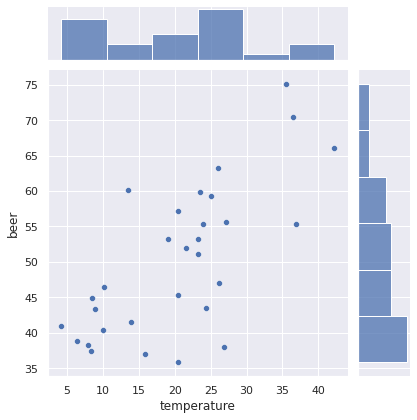

In [3]:
# data load 후 먼저 할일은 그래프 그리기이다. (EDA)
sns.jointplot(x='temperature', y='beer', data=beer);

### 5.1.3 모델 구축
맥주 매상 $~ \mathcal{N}(\beta_{0}+\beta{1}\times 기온,\sigma^{2}) $

### 5.1.4 statsmodels를 이용한 모델링
통계모델 추정을 위해
```python
import statsmodels.formula.api as smf
```
smf.ols 함수를 사용 (ols $\rightarrow$ Ordinary least squares) 최소제곱법\
모집단의 분포가 정규분포임을 가정했을 때 최대우도법(MLE)의 결과는 최소제곱법(OLS)의 결과와 일치한다.

In [4]:
lm_model = smf.ols(formula='beer~temperature', data=beer).fit()

### 5.1.5 추정 결과 표시와 게수 검정

In [5]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        14:07:43   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.1.6 summary 함수의 출력 내용 설명
- Dep.Variable: 종속변수의 이름, Dependent(종속변수)
- Model, Method: 범용최소제곱법을 사용했다는 설명
- Date, Time: 모델 추정 일시
- No. Observations: 샘플사이즈
- Df Residuals: 샘플사이즈에서 추정된 파라미터 수를 뺀것
- Df Model: 사용한 독립변수의 수
- Covariance Type: 공분산 타입, 틀별히 지정하지 않으면 nonrobust가 된다.
- R-squared, Adj. R-squared: 결정계수와 자유도 조정이 끝난 결정계수
- F-statistic, Prob (F-statistic): 분산분석 결과
- Log-Likelihood: 최대로그우도
- AIC: Akaike information criterion
- BIC: Bayesian information criterion

### AUC를 이용한 모델 선택
독립변수가 하나이므로 Null 모델의 AIC와 비교하는 작업이 된다.

In [6]:
# null 모델의 aic
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.aic

227.94194972563105

In [7]:
# 독립변수 1개인 모델의 aic
lm_model.aic

208.90902935575437

독립변수 1개인 모델의 aic 값이 작기때문에 기온이라는 독립변수가 있는 쪽이 예측 정확도가 높아지는 것이 아닐까 판단 할 수 있다.

AIC formula\
$ AIC = -2 \times (최대우도 - 추정된 파라미터 수) $

In [8]:
# 추정된 모델의 로그우도
lm_model.llf

-102.45451467787719

In [9]:
# 사용된 독립변수의 수
lm_model.df_model

1.0

In [10]:
## AIC를 계산하는 법
# 실제로 절편도 추정되었기 때문에 1을 더해서 추정된 파라미터 수를 구할 수 있다.
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

### 5.1.8 회귀직선
모델에 의한 종속변수의 추측값을 직선으로 표시한 것.\
비선형모델의 경우 **회귀곡선**이라한다.

### 5.1.9 seaborn을 이용한 회귀직선 그래프 그리기

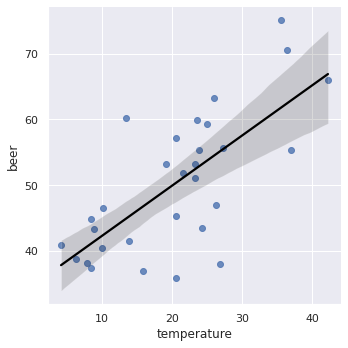

In [11]:
# 직선주위의 음영은 95% 신뢰구간을 의미
sns.lmplot(x='temperature', y='beer', data=beer, line_kws={'color':'black'});

### 5.1.10 모델을 이용한 예측

In [12]:
# 파라미터를 넣지 않으면 훈련 데이터를 사용한 값을 출력
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [13]:
# 기온 0일 때의 기대값은 절편값과 같다.
lm_model.predict({'temperature':[0]})

0    34.610215
dtype: float64

In [14]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [15]:
# 기온 20도일때 예측
lm_model.predict({'temperature':[20]})

0    49.918767
dtype: float64

In [16]:
# 위 예측값을 회귀식으로 계산하기
# lm_model.params[0] + lm_model.params[1] * 20
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperture = 20
beta0 + beta1 * temperture

49.91876701095054

### 5.1.11 Residual 잔차 계산
모델의 평가는 주로 잔차를 체크한다.\
정규선형모델의 경우 잔차가 **'평균이 0인 정규분포'** 를 따르는 것이므로 모델이 그 분포를 따르는지 체크하게 된다.

In [17]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

- 잔차 계산식\
$residuals = y - \hat{y}$\
여기서 $'\hat{y}=\beta_{0}+\beta_{1}\times 기온'$ 이다.\
이 값은 lm_model.fittedvalues 나 lm_model.predict() 와 같다.

In [18]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [19]:
# 실제값에서 예측값을 빼면 잔차가 된다.
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [20]:
np.mean(resid), np.var(resid)

(-3.386920373789811e-14, 54.18607258864832)

### 5.1.12 R-squart 결정계수
결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표이다.
### $ R^{2} = \frac{\sum_{i=1}^{N}(\hat{y}-\mu)^{2}}{\sum_{i=1}^{N}(y-\mu)^{2}} = \frac{SSE}{SST} = 1-\frac{SSR}{SST} $
모델에 의한 추측치가 종속변수의 실젯값과 일치하면 $R^{2}$ 는 1이 된다.

In [21]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat-mu)**2) / np.sum((y-mu)**2)

0.5039593230611873

In [22]:
# 인스턴스로 구하기
lm_model.rsquared

0.5039593230611857

### 5.1.13 Adjust R-squart 수정된 결정계수
독립변수의 수가 늘어나는 것에 대해 패널티를 적용한 결정계수를 **수정된 결정계수** 라고 부른다.
수정된 결정계수는 다음 식으로 계산할 수 있다. (s 는 독립변수의 수)
### $ R^{2} = 1-\frac{\sum_{i=1}^{N}residuals^{2}\diagup(N-s-1)}{\sum_{i=1}^{N}(y-\mu)^{2}\diagup (N-1)} $

In [23]:
n = len(beer.beer)
s = 1
1 - (np.sum(resid**2) / (n-s-1)) / (np.sum((y-mu)**2) / (n-1))

0.48624358459908523

In [24]:
lm_model.rsquared_adj

0.48624358459908523

### 5.1.14 Residual Graph
히스토그램으로 잔차가 정규분포의 특징을 가지고 있는지 확인한다.

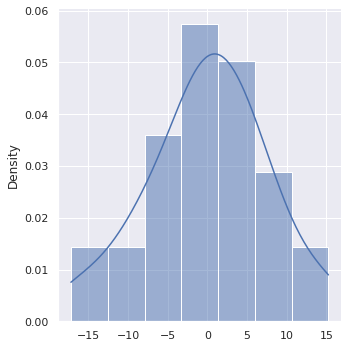

In [25]:
sns.displot(resid, kde=True, stat='density', height=5, aspect=1);

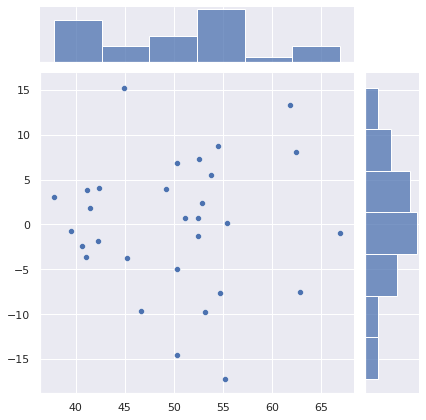

In [26]:
# X 축이 적합도, Y 축이 잔차인 산포도
sns.jointplot(x=lm_model.fittedvalues, y=resid);